In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data_complete = pd.merge(city_data, ride_data, how="outer", on=["city", "city"] )

# Display the data table for preview
pyber_data_complete.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#make dataframes for each place type (Urban, Suburban, Rural)
urban_df = pyber_data_complete.loc[pyber_data_complete["type"] == "Urban", :]
sub_df = pyber_data_complete.loc[pyber_data_complete["type"] == "Suburban", :]
rural_df = pyber_data_complete.loc[pyber_data_complete["type"] == "Rural", :]

In [3]:
#group dataframes by city name
urban_group = urban_df.groupby(["city"])
sub_group = sub_df.groupby(["city"])
rural_group = rural_df.groupby(["city"])

## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types
#x = total number of rides 
#y = average fares
#s = size of cirlce = driver count per city
# I also made some new dataframes for the data for each city type and printed them, just for personal reference. 

#Urban coordinates
x_urban_rides = urban_group["ride_id"].count()
y_urban_fares = urban_group["fare"].mean()
s_urban_drivers = urban_group["driver_count"].first()

urban_chart_raw = {"Total Rides" : x_urban_rides,
            "Average Fares" : y_urban_fares,
            "Total Drivers" : s_urban_drivers
              }

urban_chart = pd.DataFrame(urban_chart_raw)
print(urban_chart.head())

#Suburban coordinates
x_sub_rides = sub_group["ride_id"].count()
y_sub_fares = sub_group["fare"].mean()
s_sub_drivers = sub_group["driver_count"].first()

sub_chart_raw = {"Total Rides" : x_sub_rides,
            "Average Fares" : y_sub_fares,
            "Total Drivers" : s_sub_drivers
              }

sub_chart = pd.DataFrame(sub_chart_raw)
print(sub_chart.head())


#Rural coordinates
x_rural_rides = rural_group["ride_id"].count()
y_rural_fares = rural_group["fare"].mean()
s_rural_drivers = rural_group["driver_count"].first()

rural_chart_raw = {"Total Rides" : x_rural_rides,
            "Average Fares" : y_rural_fares,
            "Total Drivers" : s_rural_drivers
              }

rural_chart = pd.DataFrame(rural_chart_raw)
print(rural_chart.head())




                 Total Rides  Average Fares  Total Drivers
city                                                      
Amandaburgh               18      24.641667             12
Barajasview               22      25.332273             26
Carriemouth               27      28.314444             52
Christopherfurt           27      24.501852             41
Deanville                 19      25.842632             49
               Total Rides  Average Fares  Total Drivers
city                                                    
Barronchester           16      36.422500             11
Bethanyland             18      32.956111             22
Brandonfort             19      35.437368             10
Colemanland             22      30.894545             23
Davidfurt               17      31.995882             23
                Total Rides  Average Fares  Total Drivers
city                                                     
Bradshawfurt             10      40.064000              7
Garzaport     

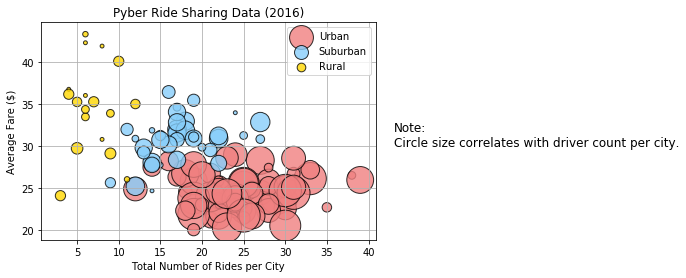

In [35]:
# Build the scatter plots for each city types
Urban = plt.scatter(x=x_urban_rides, y=y_urban_fares, s=15*s_urban_drivers,alpha=0.8, edgecolors="black", facecolors="lightcoral")
Suburban= plt.scatter(x=x_sub_rides, y=y_sub_fares, s=15*s_sub_drivers, alpha=0.8,edgecolors="black", facecolors="lightskyblue")
Rural = plt.scatter(x=x_rural_rides, y=y_rural_fares, s=15*s_rural_drivers, alpha=0.8, edgecolors="black", facecolors="gold")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(["Urban", "Suburban", "Rural"])

# Incorporate a text label regarding circle size
textstr = 'Note:\nCircle size correlates with driver count per city.'
plt.text(43,30,textstr, fontsize=12)

# Save Figure
plt.savefig("../MatPlot/pyber_bubble.png")

# Print Figure
plt.show()

## Total Fares by City Type

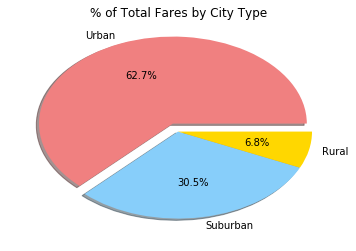

In [28]:
# Calculate % Total Fares by City Type
urban_fare_total = urban_df["fare"].sum()
sub_fare_total = sub_df["fare"].sum()
rural_fare_total = rural_df["fare"].sum()


# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_fare_total, sub_fare_total, rural_fare_total]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../MatPlot/fares_pie.png")
plt.show()


In [12]:
# Show Figure
plt.show()

## Total Rides by City Type

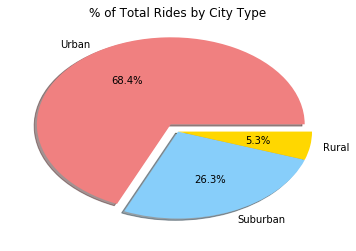

In [26]:
urban_ride_total = urban_df["ride_id"].count()
sub_ride_total = sub_df["ride_id"].count()
rural_ride_total = rural_df["ride_id"].count()


# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_ride_total, sub_ride_total, rural_ride_total]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("../MatPlot/rides_pie.png")
plt.show()


## Total Drivers by City Type

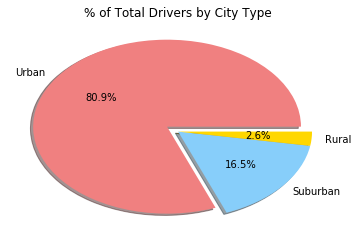

In [27]:
# Calculate Driver Percents
urban_drive_total = s_urban_drivers.sum()
sub_drive_total = s_sub_drivers.sum()
rural_drive_total = s_rural_drivers.sum()

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_drive_total, sub_drive_total, rural_drive_total]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../MatPlot/drivers_pie.png")
plt.show()

In [ ]:
#THREE DATA TRENDS:
#1. The majority of Pyber activy occurs in URBAN areas, where 68.4% of rides occur and 80.9% of drivers work.
#2. In general, as the number of drivers and rides in a place decrease, the average cost/fare per ride increases. 
#. . . Based on this observation, its is unsurprising to find that rural areas with small numbers of drivers 
#. . . experience the greatest average fares. 
#3. Only 5.3% of current Pyber rides occur in Rural areas, where close to 20% of the US population lives  and 
#. . . where public transportation options are most limited. It may be worthwhile for Pyber invest in strategies 
#. . . to improve rural ridership in order to increase profits for the company and improve mobility for people in the community. 
